<h1 style="text-align: center">Traffic Signs Recognition using CNN and Keras</h1>

<h3>1. Importing the required libraries</h3>

<p>I have created a virtual environment called 'venv' and installed the required libraries in it</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

<h3>2. Exploring the dataset</h3>

<p>In our 'train' folder, we have 43 folders each of representing different class. The range of folder is from 0 to 42</p>

<p>We iterate over all classes and append the labels and images in their representive lists.</p>

<p>We have stored all the images and their labels into lists.</p>

<p>And we converted the python list to numpy arrays for feeding to the model.</p>

In [2]:
data=[]
labels=[]
classes=43
img_resize=(30, 30)
cur_path=os.getcwd()

for i in range(classes):
    path=os.path.join(cur_path, "archive", 'train', str(i))
    images=os.listdir(path)

    for j in images:
        try:
            image=Image.open(path+"\\"+j)
            image=image.resize(img_resize)
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data=np.array(data)
labels=np.array(labels)

In [3]:
print("Data Shape: "+str(data.shape))
print("Labels Shape: "+str(labels.shape))

Data Shape: (39209, 30, 30, 3)
Labels Shape: (39209,)


<p>The shape of data is (39209, 30, 30, 3), which means that there are 39209 images of 30x30 pixels and 3 indicates that data contains colored images(RGB values)</p>

<p>We use train_test_split() method from sklearn library to split the data for training and testing purpose.</p>

In [4]:
X_train, X_test, y_train, y_test=train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3)
(31367,) (7842,)


<p>From 'keras.utils' package we use    `to_categorical` method to convert labels present in y_train and y_test into one-hot encoding.</p>

In [5]:
y_train=to_categorical(y_train, 43)
y_test=to_categorical(y_test, 43)

<h3>3. Build a CNN model</h3>

<p>To classify images into their respective categories, we build a Convolutional Neural Network(CNN) model</p>

In [6]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

# Compilation of the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

<h3>4. Train and validate the model</h3>

<p>After building the model architecture, we train the model using `model.fit()`</p>

<p>I have tried with batch size of 32 and 64. Batch Size of (32) has accuracy of 91.89% where as Batch Size of (64) has accuracy of 95.36%</p>

In [8]:
epochs=15
history_32_batch_size=model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 74s 73ms/step - loss: 2.9615 - accuracy: 0.2369 - val_loss: 0.9945 - val_accuracy: 0.7072
Epoch 2/15
981/981 [==============================] - 76s 78ms/step - loss: 1.1225 - accuracy: 0.6658 - val_loss: 0.5073 - val_accuracy: 0.8486
Epoch 3/15
981/981 [==============================] - 68s 70ms/step - loss: 0.7819 - accuracy: 0.7637 - val_loss: 0.4519 - val_accuracy: 0.8695
Epoch 4/15
981/981 [==============================] - 68s 69ms/step - loss: 0.6125 - accuracy: 0.8162 - val_loss: 0.2919 - val_accuracy: 0.9183
Epoch 5/15
981/981 [==============================] - 71s 73ms/step - loss: 0.4908 - accuracy: 0.8510 - val_loss: 0.2325 - val_accuracy: 0.9313
Epoch 6/15
981/981 [==============================] - 72s 73ms/step - loss: 0.4372 - accuracy: 0.8683 - val_loss: 0.2054 - val_accuracy: 0.9365
Epoch 7/15
981/981 [==============================] - 72s 73ms/step - loss: 0.3884 - accuracy: 0.8848 - val_loss: 0.1488 - val_accuracy:

In [9]:
epochs=15
history_64_batch_size=model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 60s 122ms/step - loss: 0.1798 - accuracy: 0.9463 - val_loss: 0.0569 - val_accuracy: 0.9832
Epoch 2/15
491/491 [==============================] - 62s 126ms/step - loss: 0.1736 - accuracy: 0.9505 - val_loss: 0.0567 - val_accuracy: 0.9837
Epoch 3/15
491/491 [==============================] - 62s 127ms/step - loss: 0.1750 - accuracy: 0.9478 - val_loss: 0.0591 - val_accuracy: 0.9848
Epoch 4/15
491/491 [==============================] - 62s 127ms/step - loss: 0.1794 - accuracy: 0.9486 - val_loss: 0.0826 - val_accuracy: 0.9787
Epoch 5/15
491/491 [==============================] - 63s 127ms/step - loss: 0.1761 - accuracy: 0.9491 - val_loss: 0.0609 - val_accuracy: 0.9823
Epoch 6/15
491/491 [==============================] - 63s 128ms/step - loss: 0.1763 - accuracy: 0.9485 - val_loss: 0.0738 - val_accuracy: 0.9779
Epoch 7/15
491/491 [==============================] - 62s 127ms/step - loss: 0.1785 - accuracy: 0.9490 - val_loss: 0.0608 - val_ac

In [10]:
#Saving the model
model.save("my_model.h5")

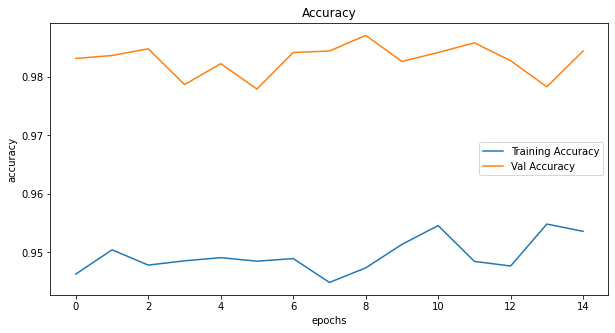

In [11]:
# Plotting the graph for accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_64_batch_size.history["accuracy"], label="Training Accuracy")
plt.plot(history_64_batch_size.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

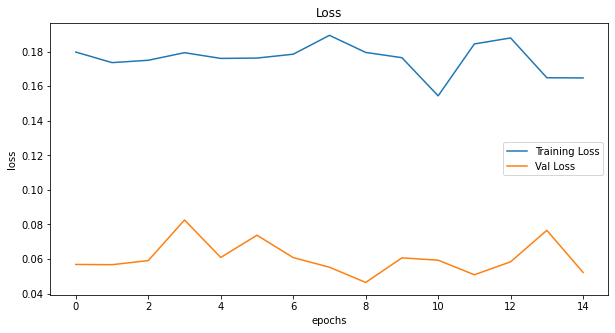

In [12]:
# Plotting the graph for loss
plt.figure(figsize=(10, 5))
plt.plot(history_64_batch_size.history["loss"], label="Training Loss")
plt.plot(history_64_batch_size.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

<h3>5. Testing our model with test dataset</h3>

<p>Dataset contains a test folder and in a test.csv file, we have details related to image path and their respective class labels.</p>

In [13]:
y_test=pd.read_csv("./archive/Test.csv")

labels=y_test["ClassId"].values
imgs=y_test["Path"].values

data=[]

for img in imgs:
    image=Image.open("./archive/"+img)
    image=image.resize(img_resize)
    data.append(np.array(image))

X_test=np.array(data)

pred=np.argmax(model.predict(X_test), axis=-1)

395/395 [==============================] - 6s 10ms/step


<p>From sklearn.metrics, we imported accuracy_score and observed that our model predicted actual labels and we achieved a 95.17% accuracy.</p>

<p>We are going to save the model that we have trained using keras model.save() function</p>

In [14]:
print(accuracy_score(labels, pred))

model.save('traffic_classifier.h5')

0.9517022961203484
